In [9]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from rewrite import *
%matplotlib inline

In [10]:
start = -5.
end = 10.
N =8
K = 15
CF = 2.**(-7)
v = 0.2
xi_p = 0.
gamma = 1./np.sqrt(1-v**2)

h = (end-start)/K
reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h
xi_int = get_x_elements(start,end,K, reference_interval)
dx_min = get_dx_min(xi_int)
dt = CF*dx_min
for i in range(len(xi_int)):
        if np.round(xi_int[i][-1],6) == np.round(xi_p,6):
            k_p = i
            break
print(k_p)
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)
dt = CF*dx_min
print(dt)

4
0.00039157033042398065


In [11]:
def ana_u(x,t):
    return -1/2*np.sin(t-np.abs(x))
def ana_du_dx(x,t):
    return  1/2*np.sign(x)*np.cos(t-np.abs(x))
def ana_du_dt(x,t):
    return -1/2*np.cos(t-np.abs(x))
def J1(t):
    return -np.cos(t)
def J2(t):
    return 0*t
def potential(x,sigma,x0):
    return 0*x
xp = 0.
for i in range(len(x)):
        if np.round(x[i][-1],6) == np.round(xp,6):
            k_xp = i
            break
print(k_xp)

4


In [12]:
t = 0.
t_target = 20.
nt = int((t_target-t)/dt)
print (nt)
u = ana_u(x,t)
p = ana_du_dt(x,t)
q = ana_du_dx(x,t)
potential_term = potential(0,0,0)

51076


In [13]:
for i in range(nt):
    un = u.copy()
    pn = p.copy()
    qn = q.copy()
    u = RK4_Step(dt, du_dt,un,pn,qn,K,N,t,M_inv,M_inv_S,False)
    p = RK4_Step(dt, dp_dt,pn,un,qn,K,N,t,M_inv,M_inv_S,True,J1, J2,k_xp,potential_term)
    q = RK4_Step(dt, dq_dt,qn,un,pn,K,N,t,M_inv,M_inv_S,True,J1, J2,k_xp)
    t += dt
print(t)

19.999846196736513


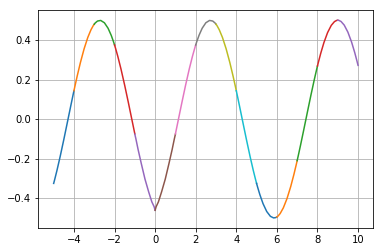

In [14]:
u_exact = ana_u(x,t)
error = np.log10(np.abs(u-u_exact))
for i in range(len(x)):
    plt.plot(x[i],u[i])
plt.grid()


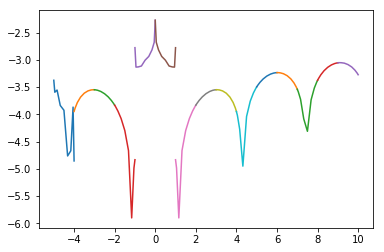

In [15]:
for i in range(len(x)):
    plt.plot(x[i],error[i])